# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations:
* Cities around the equator have the highest temperature
* There is no strong relationship between latitude and humidity 
* Most cities have wind speed of less than 15 miles per hour. 



In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [145]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [146]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

 # Get current weather
    
weather_data = []  

city_number=1

print("Beginning Data Retrieval")     
print("---------------------------------------")

for city in cities: 
    try:
        weather_data.append(ow.get_current(city, **settings))
        print(f"Processing Record {city_number} | {city}")
        city_number+=1
    except:
        print("City not found. Skipping...")
        
    # Timer 
    time.sleep(1.2)
    
print("---------------------------------------")
print("Retrieval Complete")        

#weather_data



Beginning Data Retrieval
---------------------------------------
Processing Record 1 | saint anthony
City not found. Skipping...
Processing Record 2 | dikson
Processing Record 3 | busselton
Processing Record 4 | rikitea
Processing Record 5 | kaitangata
Processing Record 6 | albany
Processing Record 7 | saint-philippe
Processing Record 8 | torbay
Processing Record 9 | dingle
Processing Record 10 | ambulu
Processing Record 11 | evensk
Processing Record 12 | hermanus
Processing Record 13 | hithadhoo
City not found. Skipping...
Processing Record 14 | ponta do sol
City not found. Skipping...
Processing Record 15 | opuwo
Processing Record 16 | hilo
Processing Record 17 | jamestown
Processing Record 18 | constitucion
Processing Record 19 | bredasdorp
Processing Record 20 | skibbereen
City not found. Skipping...
Processing Record 21 | coquimbo
Processing Record 22 | port lincoln
Processing Record 23 | carnarvon
Processing Record 24 | pevek
Processing Record 25 | jammalamadugu
Processing Record

Processing Record 221 | victoria
Processing Record 222 | coihaique
Processing Record 223 | marzuq
Processing Record 224 | namatanai
Processing Record 225 | druzhba
Processing Record 226 | nome
City not found. Skipping...
Processing Record 227 | broome
Processing Record 228 | sarangani
City not found. Skipping...
Processing Record 229 | mackay
Processing Record 230 | kalmunai
Processing Record 231 | jiblah
Processing Record 232 | dover
Processing Record 233 | miraflores
Processing Record 234 | moose factory
City not found. Skipping...
Processing Record 235 | sao joao da barra
City not found. Skipping...
Processing Record 236 | san patricio
Processing Record 237 | great falls
Processing Record 238 | sitka
City not found. Skipping...
Processing Record 239 | bagan
Processing Record 240 | jumla
Processing Record 241 | nabire
City not found. Skipping...
Processing Record 242 | ancud
Processing Record 243 | smithers
Processing Record 244 | katsuura
Processing Record 245 | santa rita
Processin

Processing Record 443 | maragogi
Processing Record 444 | comodoro rivadavia
Processing Record 445 | sept-iles
Processing Record 446 | sabang
Processing Record 447 | caravelas
Processing Record 448 | metro
Processing Record 449 | sabla
Processing Record 450 | virginia beach
Processing Record 451 | lagos
Processing Record 452 | lata
Processing Record 453 | ardakan
Processing Record 454 | nova prata
Processing Record 455 | luau
Processing Record 456 | ukiah
Processing Record 457 | aranos
Processing Record 458 | innisfail
City not found. Skipping...
Processing Record 459 | manono
Processing Record 460 | moroni
Processing Record 461 | vardo
Processing Record 462 | dong xoai
Processing Record 463 | sao leopoldo
Processing Record 464 | bilma
Processing Record 465 | kasamatsu
Processing Record 466 | mecca
Processing Record 467 | puerto leguizamo
Processing Record 468 | gat
Processing Record 469 | gilgit
Processing Record 470 | hay river
Processing Record 471 | coroata
Processing Record 472 | b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
# Create an "extracts" object to get the temperature, latitude,longitude, cloudiness, wind speed,
#humidity,data and country for each city
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat", "coord.lon","main.temp_max","wind.speed"]

column_names = ["City","Cloudiness","Country","Date ","Humidity", "Lat","Lng", "Max Temp", "Wind Speed"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

weather_data_df = pd.DataFrame(data,columns=column_names)

city_weather_df=weather_data_df.set_index("City")

city_weather_count=city_weather_df.count()

print(city_weather_count)


Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64


In [148]:
city_weather_df.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
Saint Anthony,1,US,1566611914,29,43.97,-111.68,77.00,9.17
Dikson,100,RU,1566611917,97,73.51,80.55,40.36,18.52
Busselton,28,AU,1566611919,51,-33.64,115.35,55.99,8.30
Rikitea,35,PF,1566611872,69,-23.12,-134.97,71.64,21.12
Kaitangata,77,NZ,1566611921,44,-46.28,169.85,57.99,11.99


In [149]:
#output to csv
city_weather_df.to_csv(output_data_file)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

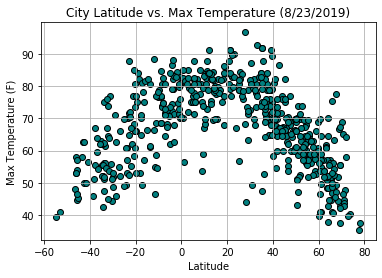

In [152]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", 
            facecolors="teal", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (8/23/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsMaxTemp.png",bbox_inches="tight", dpi = 300)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

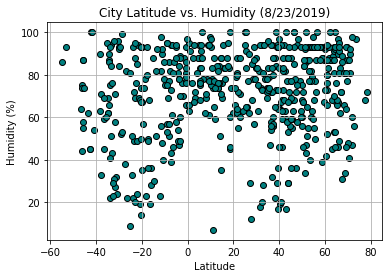

In [151]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"], marker="o", 
            facecolors="teal", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (8/23/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("CityLatvsHumidity.png",bbox_inches="tight", dpi = 300)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

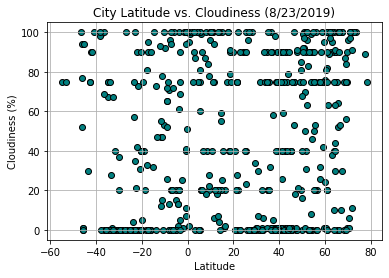

In [154]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"], marker="o",
           facecolors="teal", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (8/23/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("CityLatvsCloudiness.png",bbox_inches="tight", dpi = 300)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

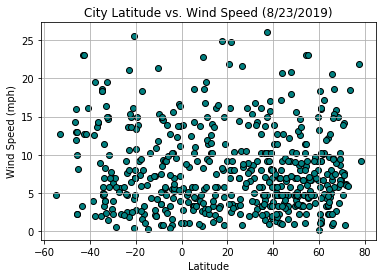

In [156]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"], marker="o",
            facecolors="teal", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (8/23/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsWindSpeed.png",bbox_inches="tight", dpi = 300)

# Show plot
plt.show()